## Best and Worst Businesses

#### Data loading (153 MB)

In [32]:
import pandas as pd

# read the entire file into a python array
with open('../yelp_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)
print("business.json contains %i records, each composed by %i columns." % (df.shape[0], df.shape[1]))

business.json contains 209393 records, each composed by 14 columns.


#### Most common categories

In [70]:
c = []
for el in df['categories']:
    for cat in str(el).split(', '):
        if cat not in c:
            c.append(cat)
            
categories = {}
for cat in c:
    categories[cat] = []

for el in df.to_dict('records'):
    if el['categories'] != None:
        for cat in el['categories'].split(', '):
            categories[cat].append(el['name'])
            
categories_counts = [{'cat': cat, 'count': len(categories[cat])} for cat in categories]
categories_counts = sorted(categories_counts, key=lambda x: x['count'], reverse=True)
pd.DataFrame(categories_counts[:10])

,cat,count
0,Restaurants,63944
1,Shopping,34644
2,Food,32991
3,Home Services,22487
4,Beauty & Spas,20520
5,Health & Medical,19227
6,Local Services,15783
7,Automotive,14720
8,Nightlife,14211
9,Bars,12400


In [71]:
df_restaurants = df.loc[df['categories'].str.contains("Restaurants", na=False)]
df_shopping = df.loc[df['categories'].str.contains("Shopping", na=False)]
df_health = df.loc[df['categories'].str.contains("Health & Medical", na=False)]
df_automotive = df.loc[df['categories'].str.contains("Automotive", na=False)]

#### Best rated and worst rated

In [94]:
from IPython.display import display, Markdown

def display_best_and_worst(df, cat):
    best_rated = df.sort_values(by=['stars', 'review_count'], ascending=False).head(50)
    worst_rated = df.sort_values(by=['stars', 'review_count'], ascending=(True, False)).head(50)

    display(Markdown("#### Best Rated %s" % cat))
    i = 1
    for index, row in best_rated.head(3).iterrows():
        to_print = ("%i. **%s**, %s, %s, %s (id: %i) with _%i_ stars over *%i* reviews."
              % (i, row['name'], 
                 row['address'] if row['address'] != "" else "unknown", 
                 row['city'], row['state'], index, row['stars'], row['review_count']))
        display(Markdown(to_print))
        i = i + 1

    display(Markdown("#### Worst Rated %s" % cat))
    i = 1
    for index, row in worst_rated.head(3).iterrows():
        to_print = ("%i. **%s**, %s, %s, %s (id: %i) with _%i_ stars over *%i* reviews."
              % (i, row['name'], 
                 row['address'] if row['address'] != "" else "unknown", 
                 row['city'], row['state'], index, row['stars'], row['review_count']))
        display(Markdown(to_print))
        i = i + 1
    return best_rated, worst_rated
        
best_restaurants, worst_restaurants = display_best_and_worst(df_restaurants, "Restaurants")
best_shopping, worst_shopping = display_best_and_worst(df_shopping, "Shopping")
best_health, worst_health = display_best_and_worst(df_health, "Health & Medical")
best_automotive, worst_automotive = display_best_and_worst(df_automotive, "Automotive")

#### Best Rated Restaurants

1. **Little Miss BBQ**, 4301 E University Dr, Phoenix, AZ (id: 141155) with _5_ stars over *2329* reviews.

2. **Brew Tea Bar**, 7380 S Rainbow Blvd, Ste 101, Las Vegas, NV (id: 12657) with _5_ stars over *1827* reviews.

3. **Cocina Madrigal**, 4044 S 16th St, Phoenix, AZ (id: 159659) with _5_ stars over *1107* reviews.

#### Worst Rated Restaurants

1. **McDonald's**, 2851 W Washington, Las Vegas, NV (id: 152764) with _1_ stars over *53* reviews.

2. **KFC**, 1470 N 8th St, Avondale, AZ (id: 26236) with _1_ stars over *51* reviews.

3. **McDonald's**, 10108 Charlotte Hwy, Fort Mill, SC (id: 161484) with _1_ stars over *49* reviews.

#### Best Rated Shopping

1. **Eco-Tint**, 4510 W Diablo Dr, Ste A102, Las Vegas, NV (id: 77614) with _5_ stars over *853* reviews.

2. **Studio 21 Tattoo Gallery**, 6020 W Flamingo Rd, Ste B-2, Las Vegas, NV (id: 72569) with _5_ stars over *468* reviews.

3. **FINO for MEN**, 7207 W Sahara Ave, Ste 100, Las Vegas, NV (id: 207780) with _5_ stars over *458* reviews.

#### Worst Rated Shopping

1. **DIRECTV**, unknown, Phoenix, AZ (id: 54146) with _1_ stars over *329* reviews.

2. **Bank of America Store and Heritage Center**, 100 N Tryon St, Ste 115, Charlotte, NC (id: 115078) with _1_ stars over *221* reviews.

3. **Teleflora Fresh Flowers**, unknown, Las Vegas, NV (id: 111619) with _1_ stars over *193* reviews.

#### Best Rated Health & Medical

1. **Bangkok Thai Spa Massage**, 4825 W Flamingo Rd, Ste 8, Las Vegas, NV (id: 24504) with _5_ stars over *320* reviews.

2. **Simply Skin Las Vegas**, 6670 S Tenaya Way, Ste 190, Las Vegas, NV (id: 63910) with _5_ stars over *289* reviews.

3. **Richards Cosmetic Surgery, Med Spa & Laser Center**, 3860 S Hualapai Way, Las Vegas, NV (id: 167926) with _5_ stars over *266* reviews.

#### Worst Rated Health & Medical

1. **SilverScript Medicare**, unknown, Phoenix, AZ (id: 159766) with _1_ stars over *90* reviews.

2. **Apria Healthcare**, 7370 Eastgate Rd, Ste 140 & 145, Henderson, NV (id: 19372) with _1_ stars over *31* reviews.

3. **OptumCare Primary Care - Deer Valley**, 20040 N 19th Ave, Ste A, Phoenix, AZ (id: 135728) with _1_ stars over *30* reviews.

#### Best Rated Automotive

1. **Eco-Tint**, 4510 W Diablo Dr, Ste A102, Las Vegas, NV (id: 77614) with _5_ stars over *853* reviews.

2. **Precision Window Tint**, 1010 N Stephanie St, Ste A1, Henderson, NV (id: 927) with _5_ stars over *352* reviews.

3. **DC Auto Luxury Window Tinting**, 6620 S Tenaya Way, Ste 180, Las Vegas, NV (id: 183768) with _5_ stars over *345* reviews.

#### Worst Rated Automotive

1. **Phoenix Car Rental**, 2934 E McDowell Rd, Phoenix, AZ (id: 40343) with _1_ stars over *229* reviews.

2. **LendingTree**, 11115 Rushmore Dr, Charlotte, NC (id: 57114) with _1_ stars over *81* reviews.

3. **Seller Networks**, unknown, Las Vegas, NV (id: 207199) with _1_ stars over *78* reviews.

#### Cities with Best Rated Businesses

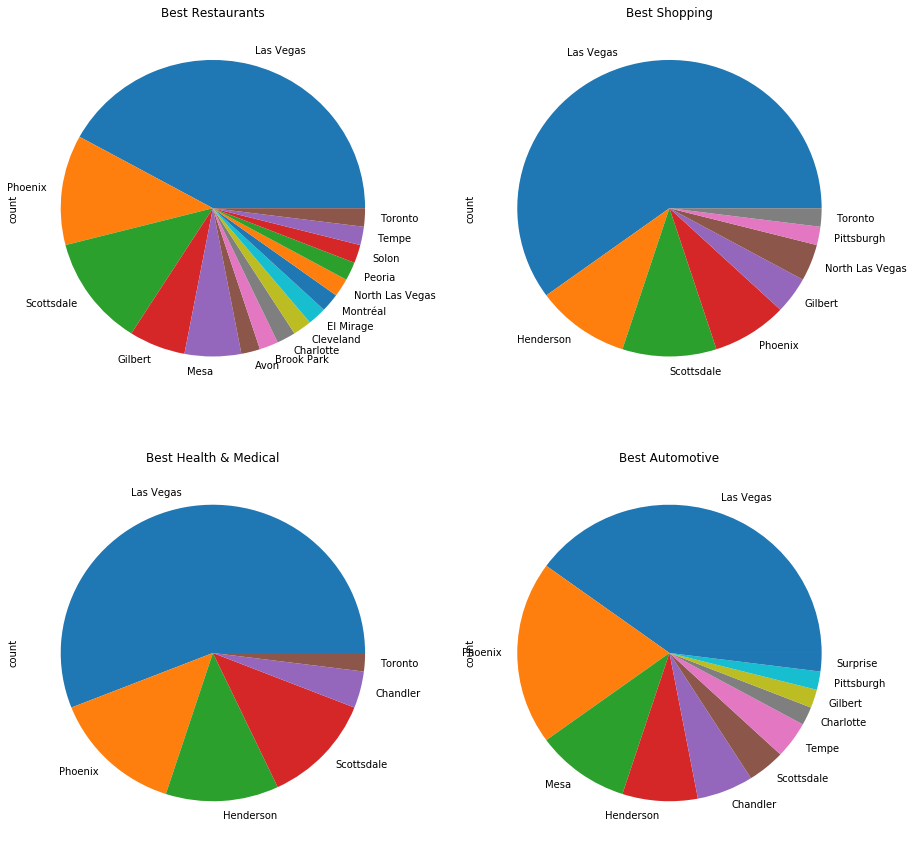

In [77]:
def plot_pie(df, cat, axes):
    cities = df.groupby(['city', 'state']).size().reset_index(name='count')
    cities = cities.sort_values(by=['count'], ascending=False)
    cities = cities.set_index('city')
    axes.set_title(cat)
    cities.plot.pie(x='city', y='count', ax=axes, legend=False)
    return cities
        
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
        
best_restaurants_cities = plot_pie(best_restaurants, "Best Restaurants", axes[0][0])
best_shopping_cities = plot_pie(best_shopping, "Best Shopping", axes[0][1])
best_health_cities = plot_pie(best_health, "Best Health & Medical", axes[1][0])
best_automotive_cities = plot_pie(best_automotive, "Best Automotive", axes[1][1])

#### Cities with Worst rated Businesses

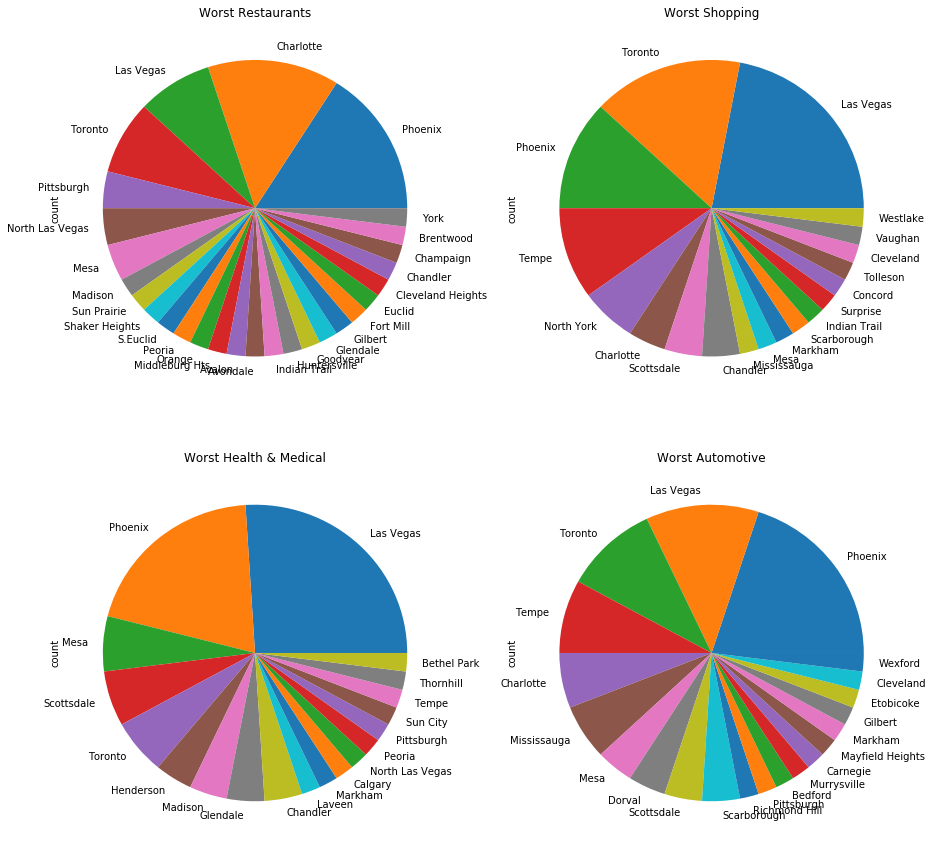

In [90]:
def plot_pie(df, cat, axes):
    cities = df.groupby(['city', 'state']).size().reset_index(name='count')
    cities = cities.sort_values(by=['count'], ascending=False)
    cities = cities.set_index('city')
    axes.set_title(cat)
    cities.plot.pie(x='city', y='count', ax=axes, legend=False)
    return cities
        
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
        
worst_restaurants_cities = plot_pie(worst_restaurants, "Worst Restaurants", axes[0][0])
worst_shopping_cities = plot_pie(worst_shopping, "Worst Shopping", axes[0][1])
worst_health_cities = plot_pie(worst_health, "Worst Health & Medical", axes[1][0])
worst_automotive_cities = plot_pie(worst_automotive, "Worst Automotive", axes[1][1])

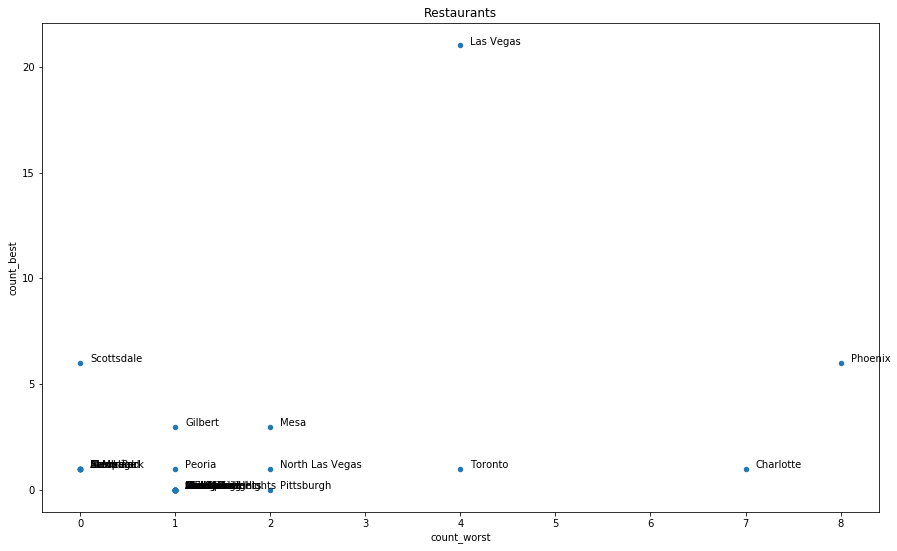

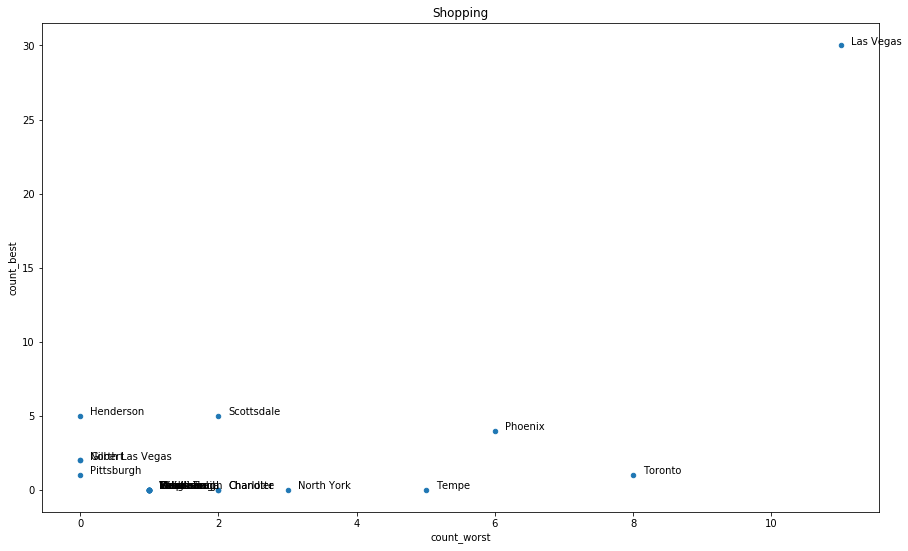

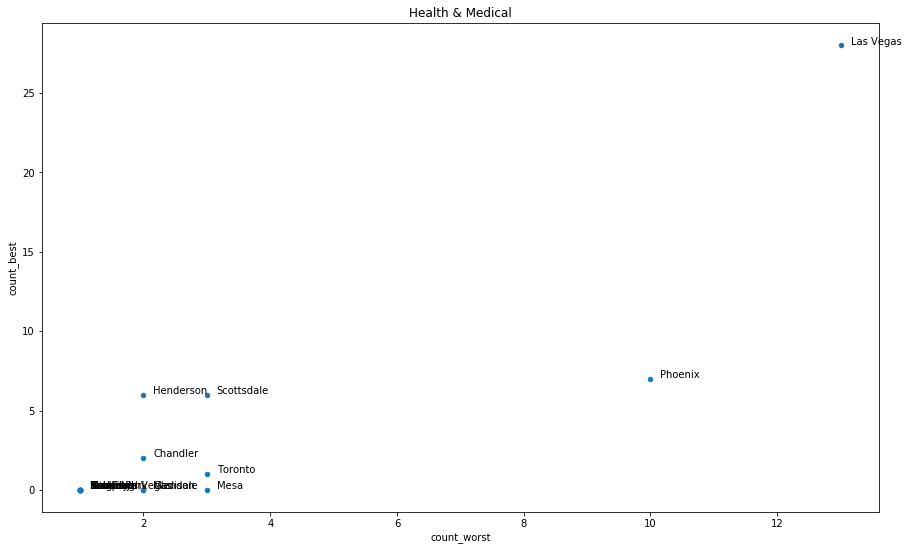

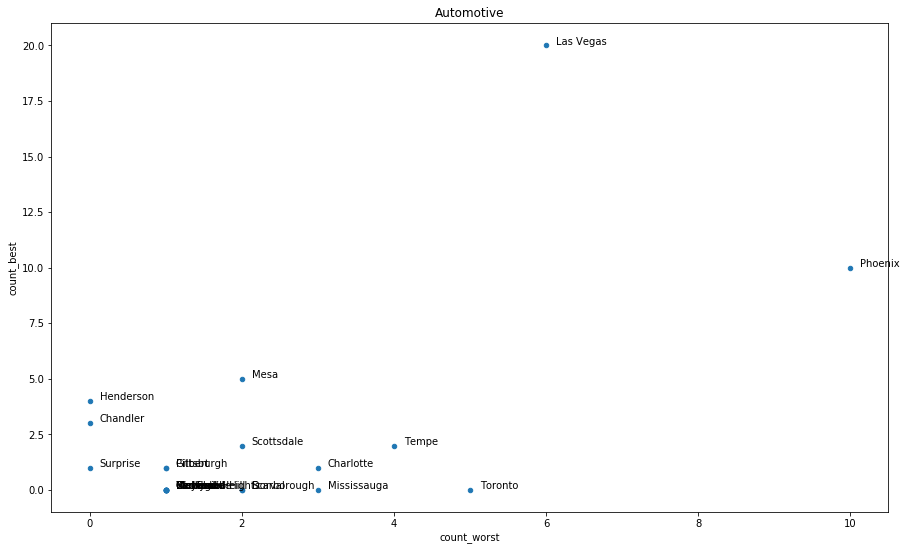

In [93]:
import matplotlib.pyplot as plt

def plot_scatter(df_best, df_worst, cat):
    df = pd.merge(df_best, df_worst, on=['city', 'state'], how='outer', 
                  suffixes=('_best', '_worst')).fillna(0)
    fig, ax = plt.subplots()
    plt.title(cat)
    df.plot.scatter(x='count_worst', y='count_best', ax=ax, figsize=(15,9))
    for i in range(df.shape[0]):
        plt.annotate(df.index.tolist()[i], (df.count_worst.tolist()[i], df.count_best.tolist()[i]),
                    xytext=(10, 0.95), textcoords="offset points")

plot_scatter(best_restaurants_cities, worst_restaurants_cities, "Restaurants")
plot_scatter(best_shopping_cities, worst_shopping_cities, "Shopping")
plot_scatter(best_health_cities, worst_health_cities, "Health & Medical")
plot_scatter(best_automotive_cities, worst_automotive_cities, "Automotive")

#### Results

Four of the ten major categories have been analyzed: *Restaurants*, *Shopping*, *Health & Medical* and *Automotive*.

**Little Miss BBQ** (Phoenix, AZ), **Brew Tea Bar** (Las Vegas, NV) and **Cocina Madrigal** (Phoenix, AZ) are the best restaurants according to average star rating and number of reviews, meanwhile **McDonald's** (Las Vegas, NV), **KFC** (Avondale, AZ) and **McDonald's** (Fort Mill, SC) are the worst.

Among the shopping businesses, the best are **Eco-Tint** (Las Vegas, NV), **Studio 21 Tattoo Gallery** (Las Vegas, NV) and **FINO for MEN** (Las Vegas, NV). The worst are **DIRECTV** (Phoenix, AZ), **Bank of America Store and Heritage Center** (Charlotte, NC) and **Teleflora Fresh Flowers** (Las Vegas, NV).

**Bangkok Thai Spa Massage** (Las Vegas, NV), **Simply Skin Las Vegas** (Las Vegas, NV) and **Richards Cosmetic Surgery, Med Spa & Laser Center** (Las Vegas, NV) are the best places for the category *Health & Medical*. Regarding the same category, the worst places are **SilverScript Medicare** (Phoenix, AZ), **Apria Healthcare** (Henderson, NV) and **OptumCare Primary Care - Deer Valley** (Phoenix, AZ).

Best businesses for *Automotive* are **Eco-Tint** (Las Vegas, NV), **Precision Window Tint** (Henderson, NV) and **DC Auto Luxury Window Tinting** (Las Vegas, NV). The worst are **Phoenix Car Rental** (Phoenix, AZ), **LendingTree** (Charlotte, NC) and **Seller Networks** (Las Vegas, NV).

Considering cities, **Las Vegas** is the city where we can find the best businesses, considering these four categories, followed by **Phoenix**.